<a href="https://colab.research.google.com/github/segrelab/BF571-Materials/blob/main/Week_1/Intro_to_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-Up

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
# Change this to be the file path in your drive to the folder where this file is saved
filepath = '/content/gdrive/MyDrive/Segrè Lab Shared/BF571/Student Versions/Week 1'

# Introduction to NetworkX

In the python world, there is a library called NetworkX that allows us to manipulate, analyze and model graph data. Let's see how we can use the NetworkX API to analyze graph data.


The first thing you will need to do is import the NetworkX package. NetworkX is typically imported as nx.

We'll also be using a few other standard packages, which we have imported here.

In [3]:
import numpy as np
import pandas as pd
import json
import os

## Loading and Visualization


Graphs in networkX can be created in a few different ways:

- We can create an empty graph and add the vertices and edges either one by one or from a list.
- We can load a graph from an adjacency list or matrix.
- We can create a graph from a pandas dataframe.
- We can load a graph from filetypes specificlly for storing netowrks, such as a Cytoscape.js supprted JSON.
- Finally, some special graphs (complete graphs, complete bipartite graphs, ...) can be created using special functions.

In this class we will cover the first five cases, and may cover special graphs later.

### Create a Graph From Scratch



Using `nx.Graph()` we can initialize an empty graph to which we can add nodes and edges.

Take a look at the graph opject and its nodes and edges by using the variable `G` and the methods `nodes()` and `edges()`.

#### Add Nodes to the Empty Graph

Use the `add_node` method to add a single node by itself. The first argument is the ID for the node itself, and can be any hashable Python object other than None, that can be used as a key in a Python dictionary. This includes strings, numbers, tuples of strings and numbers, etc.

For our graph, we will add a node with the id `1` (the integer).

You can also add multiple nodes at once using the `add_nodes_from` method. Here, provide the function with an iterable container, such as a list with your node IDs.

For our graph, add a list of the nodes `2` and `3`.

Now that we have added some nodes, use the `nodes()` method to look at them all.

You can also add nodes along with node attributes if your container yields 2-tuples of the form `(node, node_attribute_dict)`:

Now check if the new nodes are visible in the list.

To see the metadata for the nodes as well, you will need to use the `data=True` argument in the `nodes` method.

Now that we've added some nodes, let's see what our network looks like. We can visualize our network using the `draw` function from `nx` and supplying it with our graph, `G`.

Now we need to connect the nodes of the graph to make it look more like a network!

#### Connect Notes using Edges

As we saw on the plot, we currently have no edges, we can also verify this using the `edges` method.

Just like we did with the nodes, `G` can also be grown by adding one edge at a time, using the `add_edge` method. For nodes we only needed one variable, the ID for that node, but for edges we will need two variables- the two node IDs that our edge is connecting.

Use the `add_edge` method to create an edge between node `1` and node `2`.

Like nodes, we can all add a list of edges by passing a tuple for each edge inside of a list.

Add edges between `1` and `3` and between `1` and `4` using the `add_edges_from` method.

Let's take a look at the edges we've created so far.

Edges can also be associated with metadata. One of the most common types of metadata you will see is `weight` which can represent the strength of a relationship between two nodes. You can associate an edge with its metadata by using keywords.

Add an edge betweeen nodes `2` and `4` and use the keyword `weight` to specify that the weight of the edge is 3.

Like with the nodes, we can see the edges and their associated metadata by using the `data=True` argument to the `edges` method.

Lets use the `draw` function to visualize our network again now that we have edges.

### Create a Graph From an Adjacency List

An adjacency list represents a graph as an array of linked lists. The index of the array represents a vertex and each element in its linked list represents the other vertices that form an edge with the vertex.

For example, we have a graph below.
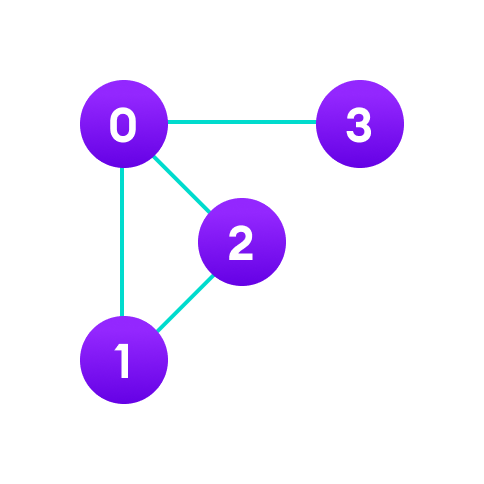

We can represent this graph in the form of a linked list as shown below.
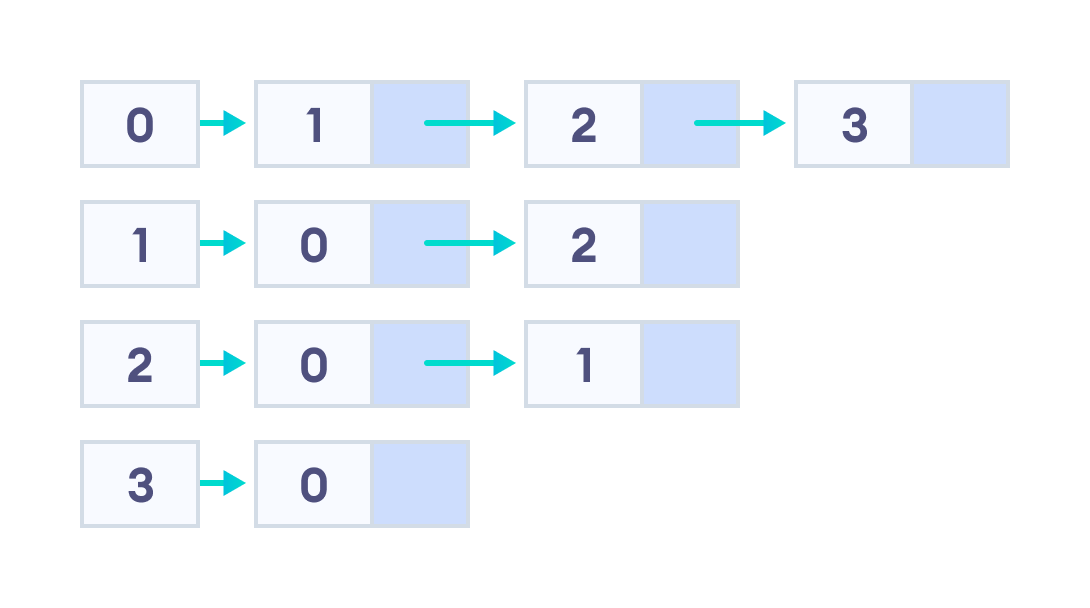

Here, 0, 1, 2, 3 are the vertices and each of them forms a linked list with all of its adjacent vertices. For instance, vertex 1 has two adjacent vertices 0 and 2. Therefore, 1 is linked with 0 and 2 in the figure above.

Here we are explicitly defining the links both ways (i.e. 0 is conncected with 1, and 1 is connected with 0). However, in an undirected network, there is no need to define an edge twice.

So we can redefine our adjacency list as:
0 --> 1, 2, 3
1 --> 2

To write this in python we will create one list, with each line in the adjacency list defined as one string, and each line separated by commas.

We can read in that adjacency list variable using the `parse_adjlist` function from `nx`. We will also need to specify that the IDs of our nodes are integers, using the `nodetype=int` argument.

Now, visualize the network.

### Create a Graph from an Adjacency Matrix

Another way of represnting the same graph is with an Adjacency Matrix. In the adjacency matrix, the rows and columns are each of the nodes, and 0s and 1s represent if there is an edge between the two.

So for our graph, the adjacency matrix looks like:
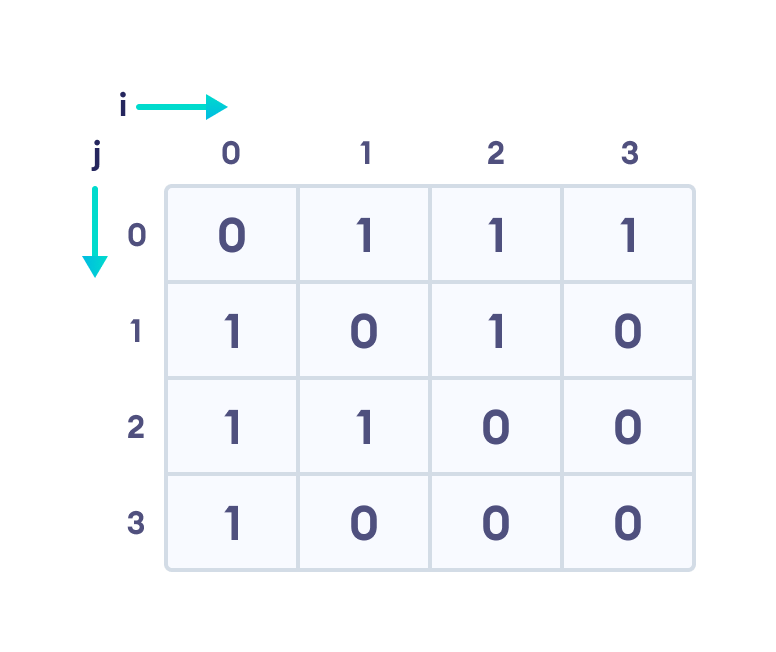

For undirected graphs, this matrix will always be symmetrical, but for directed graphs it may not be.

We have saved our adjacency matrix as a NumPy array.

In [4]:
adj_matrix = np.array([[0, 1, 1, 1],
                       [1, 0, 1, 0],
                       [1, 1, 0, 0],
                       [1, 0, 0, 0]])

Print the adjacency matrix to inspect it.

We can create a graph using the `Graph` function from `nx` and supplying our matrix as an argument. We will also need to give the argument `nodetype=int`.

Now visualize the graph.

### Create a Graph from a Pandas Dataframe

Another way of defining a graph with edge parameters is through the from_pandas_dataframe() function. It allows us to read in a dataframe where each row corresponds to one edge and each additional column to an attribute.

Consider this basic dataframe with four edges with the attributes color and weight.

In [5]:
df = pd.DataFrame({ 'n1' : [1, 2, 2, 3],
                    'n2' : [2, 3, 4, 4],
                    'color' : ["blue","green","blue","orange"],
                    'weight' : [1, 2, 3, 4] })


You can use the `nx` function `from_pandas_dataframe` to create the graph including all of the metadata for the edges. Use the [documentation on the NetworkX website](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) to determine the correct arguments to use.

Check that your graph has all the edges with their associated metadata.

### Load a Graph from a JSON file

Declare the full path to the saved file in the shared drive.

In [6]:
filename = os.path.join(filepath, 'Annotated Badger Network.cyjs')

We have written a function to open the json file and read in the node and edge information. This function is specific to the JSON structure of our file.

In [7]:
def cyjs2graph(cyjs_file_name):

    cyjson = json.load(open(cyjs_file_name))

    name_from_id = {}
    for node in cyjson["elements"]["nodes"]:
        name_from_id[node['data']['id']] = node['data']['name']

    edge_list = []
    for edge in cyjson["elements"]["edges"]:
        src_id = edge['data']['source']
        src_name = name_from_id[src_id]
        tgt_id   = edge['data']['target']
        tgt_name = name_from_id[tgt_id]
        edge_list.append([src_name, tgt_name])
  
    graph = nx.from_edgelist(edge_list, create_using=nx.Graph)
    return graph

Use the custom function to read in the JSON file by supplying the full path to the file as the variable.

Inspect the nodes of our graph.

Visualize our new graph.